1. Let's all the packages we need for our setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install requests==2.27.1
!pip install langchain pypdf2 openai chromadb tiktoken docx2txt

In [ ]:
import openai
import os
import langchain

!pip install pypdf
!pip install pypdf2
!pip install unstructured


In [ ]:
import os
from langchain.document_loaders import UnstructuredPDFLoader, OnlinePDFLoader
os.environ["OPENAI_API_KEY"] = ''
file_id = "1G57JWSWmC-SETVdLeC5miNU6sqLttoUt"
url = 'https://drive.google.com/uc?id={}'.format(file_id)
pdf_loader = OnlinePDFLoader("https://www.sbs.ox.ac.uk/sites/default/files/2019-01/cv-template.pdf")
documents = pdf_loader.load()

2. Let's convert our pdf into a document
3. We will use PyPDFLoader class
4. Let us also setup OpenAI API Key. This is required later

This returns a list of documents. One document per each page of the pdf. In terms of Python types, it will return a List[Document]. So, the index of the list will corresponding to the page of the document. That is: document[0] for the first page, document[1] for the second page and so on.

The simplest question and answer we can use is: load_qa_chain. It loads a chain that allows you to pass in all of the documents you would like to query against

In [ ]:
from langchain.llms import OpenAI
from langchain.chains.question_answering import load_qa_chain

#We are specifying that OpenAI is the LLM we want to use in our chain

chain = load_qa_chain(llm=OpenAI())
query = 'Who is the CV about?'
response = chain.run(input_documents=documents, question=query)
print(response)

 The CV is about the person whose details are listed at the top of the document: Forename SURNAME, professional email address, UK landline or mobile.


The process that is happening is:

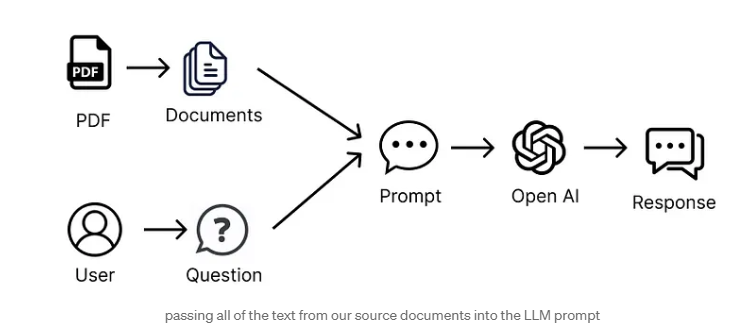

Also, the load_qa_chain actually wraps the entire prompt in some text, instructing the LLM to use only the information from the provided context. So the prompt being sent to OpenAI looks something like the following:

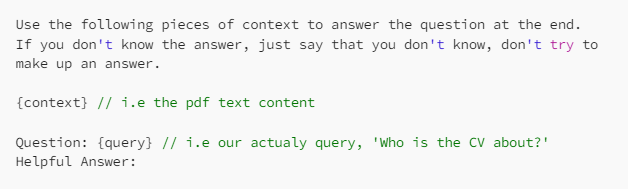

This method is good when we have only a short amount of information to send in the context. Most LLMs will have a limit on the amount of information that can be sent in a single request.

Next what we do is:

1) Split all the documents into small chunks of text
2) Turn each chunk into an embedding
3) Store the embeddings in a vector store

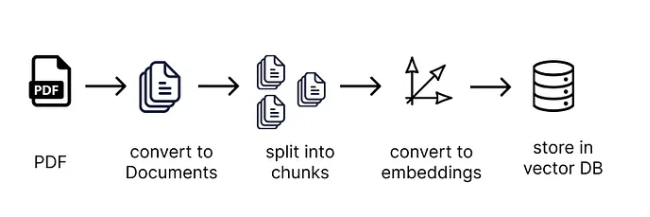